## Import stuff of D7RGESolver and $\nu\text{DoBe}$ 

In [1]:
import numpy as np
import sys
import os
sys.path.append("..")  
####################### Import stuff of nuDoBe ##################################
nudobe_path = os.path.join("..", "external_tools", "nudobe", "src")
sys.path.append(nudobe_path)
sys.path.append(os.path.join("..", "external_tools", "nudobe"))  
import nudobe
#################################################################################

####################### Import stuff of D7RGESolver #############################
from ovbb import halflife_scale, scan_halflife
#################################################################################
%matplotlib inline

### Function to generate the half-life of $0\nu\beta\beta$ decay with the $\Lambda_{\text{NP}}$ and the WC

In [2]:
halflife_scale("DLDH1_11",NPscale=1e4,WC=1.07e-18)  ## generate the half-life in unit of year with a given WC at NP scale

2.2863183860919135e+26

#### Generate the data of half-life versus $C_7^i$

In [ ]:
num_points=50
min_scale=500
max_scale=500e3
data_DLDH1 = scan_halflife(wc_name="DLDH1_11",wc_value=1e-18,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_DLDH2 = scan_halflife(wc_name="DLDH2_11",wc_value=1e-18,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_LHW = scan_halflife(wc_name="LHW_11",wc_value=1e-18,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_LeDH = scan_halflife(wc_name="LeDH_11",wc_value=1e-16,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_dLQLH1 = scan_halflife(wc_name="dLQLH1_1111",wc_value=1e-16,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_dLQLH2 = scan_halflife(wc_name="dLQLH2_1111",wc_value=1e-16,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_QuLLH = scan_halflife(wc_name="QuLLH_1111",wc_value=1e-17,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_dLueH = scan_halflife(wc_name="dLueH_1111",wc_value=1e-14,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_duLDL = scan_halflife(wc_name="duLDL_1111",wc_value=1e-15,min_scale=min_scale, max_scale=max_scale, num_points=num_points)
data_LH = scan_halflife(wc_name="LH_11",wc_value=1e-20,min_scale=min_scale, max_scale=max_scale, num_points=num_points)

#### Save the data

In [ ]:
os.makedirs('data', exist_ok=True)

np.savetxt('data/data_DLDH1.txt', data_DLDH1)  
np.savetxt('data/data_DLDH2.txt', data_DLDH2)
np.savetxt('data/data_LHW.txt', data_LHW)
np.savetxt('data/data_LeDH.txt', data_LeDH)
np.savetxt('data/data_dLQLH1.txt', data_dLQLH1)
np.savetxt('data/data_dLQLH2.txt', data_dLQLH2)
np.savetxt('data/data_QuLLH.txt', data_QuLLH)
np.savetxt('data/data_dLueH.txt', data_dLueH)
np.savetxt('data/data_duLDL.txt', data_duLDL)
np.savetxt('data/data_LH.txt', data_LH)

#### Import the data

In [1]:
import numpy as np
data_DLDH1 = np.loadtxt('data/data_DLDH1.txt')
data_DLDH2 = np.loadtxt('data/data_DLDH2.txt') 
data_LHW = np.loadtxt('data/data_LHW.txt')
data_LeDH = np.loadtxt('data/data_LeDH.txt')
data_dLQLH1 = np.loadtxt('data/data_dLQLH1.txt')
data_dLQLH2 = np.loadtxt('data/data_dLQLH2.txt')
data_QuLLH = np.loadtxt('data/data_QuLLH.txt')
data_dLueH = np.loadtxt('data/data_dLueH.txt')
data_duLDL = np.loadtxt('data/data_duLDL.txt')
data_LH = np.loadtxt('data/data_LH.txt')

## Draw the plot of half-life versus $C_7$

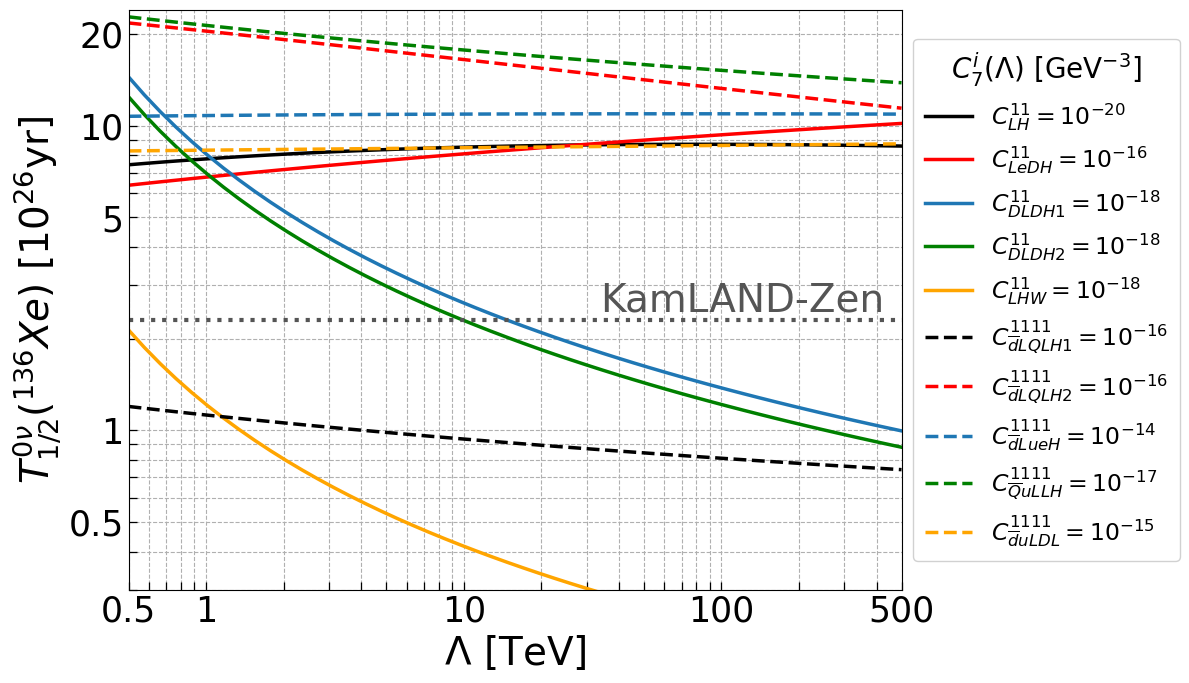

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, FuncFormatter



fig = plt.figure(figsize=(12, 8.5))
ax = plt.subplot(111)


custom_colors = [
    'black',   # 0
    'red',     # 1
    '#1f77b4',    # 2
    'green',   # 3
    'orange',  # 4   
]

# line_styles = [
#     '-',         
#     '--',       
#     '-.',       
#     ':',         
#      '-',        
#     '--',        
#     '-.',       
#     ':',         
#      '-',        
#     '--',        
#     '-.',        
#     ':',         
   
# ]

line_styles = [
    '-',         
    '--'         
]

ax.set_ylim(0.3, 24)
ax.set_xlim(0.5, 500)


lines = [

    ax.loglog(data_LH[:,0]*1e-3, data_LH[:,1]*1e-26, 
             linestyle=line_styles[0], color=custom_colors[0],  
             label=r'$C_{LH}^{11}=10^{-20}$', linewidth=2.5)[0],
             
    ax.loglog(data_LeDH[:,0]*1e-3, data_LeDH[:,1]*1e-26, 
             linestyle=line_styles[0], color=custom_colors[1],  
             label=r'$C_{LeDH}^{11}=10^{-16}$', linewidth=2.5)[0],

    ax.loglog(data_DLDH1[:,0]*1e-3, data_DLDH1[:,1]*1e-26, 
             linestyle=line_styles[0], color=custom_colors[2],  
             label=r'$C_{DLDH1}^{11}=10^{-18}$', linewidth=2.5)[0],
    
    ax.loglog(data_DLDH2[:,0]*1e-3, data_DLDH2[:,1]*1e-26, 
             linestyle=line_styles[0], color=custom_colors[3],  
             label=r'$C_{DLDH2}^{11}=10^{-18}$', linewidth=2.5)[0],

    ax.loglog(data_LHW[:,0]*1e-3, data_LHW[:,1]*1e-26, 
             linestyle=line_styles[0], color=custom_colors[4],  
             label=r'$C_{LHW}^{11}=10^{-18}$', linewidth=2.5)[0],

    ax.loglog(data_dLQLH1[:,0]*1e-3, data_dLQLH1[:,1]*1e-26, 
             linestyle=line_styles[1], color=custom_colors[0],  
             label=r'$C_{\overline{d}LQLH1}^{1111}=10^{-16}$', linewidth=2.5)[0],
    
    ax.loglog(data_dLQLH2[:,0]*1e-3, data_dLQLH2[:,1]*1e-26, 
             linestyle=line_styles[1], color=custom_colors[1],  
             label=r'$C_{\overline{d}LQLH2}^{1111}=10^{-16}$', linewidth=2.5)[0],
    

    ax.loglog(data_dLueH[:,0]*1e-3, data_dLueH[:,1]*1e-26, 
             linestyle=line_styles[1], color=custom_colors[2],  
             label=r'$C_{\overline{d}LueH}^{1111}=10^{-14}$', linewidth=2.5)[0],

    ax.loglog(data_QuLLH[:,0]*1e-3, data_QuLLH[:,1]*1e-26, 
             linestyle=line_styles[1], color=custom_colors[3],  
             label=r'$C_{\overline{Q}uLLH}^{1111}=10^{-17}$', linewidth=2.5)[0],
    
    
    ax.loglog(data_duLDL[:,0]*1e-3, data_duLDL[:,1]*1e-26, 
             linestyle=line_styles[1], color=custom_colors[4],  
             label=r'$C_{\overline{d}uLDL}^{1111}=10^{-15}$', linewidth=2.5)[0],
    
]


ax.set_xlabel(r'$\Lambda\ [\mathrm{TeV}]$', fontsize=28)
ax.set_ylabel(r'$T_{1/2}^{0\nu}(^{136} Xe)\ [10^{26}\mathrm{yr}]$', fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=25)

ax.yaxis.set_major_locator(FixedLocator([0.5, 1, 5, 10,  20]))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:g}"))

ax.xaxis.set_major_locator(FixedLocator([0.5, 1, 10, 100, 500]))

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:g}"))


legend = ax.legend(fontsize=17, 
                  framealpha=0.9,
                  loc='center left',
                  bbox_to_anchor=(1.0, 0.5),  
                  ncol=1,
                  borderpad=0.5,
                  handlelength=2,  
                  title=r'$C_7^i(\Lambda)\ [\mathrm{GeV}^{-3}]$', 
                  title_fontsize=20)  

plt.subplots_adjust(right=0.6)  


ax.xaxis.set_minor_locator(plt.NullLocator())  


ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))
ax.tick_params(axis='both', which='both', direction='in', length=6, width=0.9)
ax.set_box_aspect(0.75)
ax.axhline(y=2.3, color='#555555', linestyle=':', linewidth=3)

ax.text(
    0.61, 0.48, r"KamLAND-Zen",
    fontsize=28,
    color='#555555',
    transform=ax.transAxes
)

ax.grid(True, which="both", ls="--", alpha=1)
fig.tight_layout()

plt.savefig('Figures/halflife_scan_scale.pdf', bbox_inches='tight', dpi=300, pad_inches=0.2)
plt.show()